# Denoising Autoencoder: Removing noise from the MNIST dataset

## Imports

In [1]:
# importing functions and classes from our framework
from dataset import Dataset
from nn import MLP
from layers import Dense
# other imports
import matplotlib.pyplot as plt

## Theory

### Autoencoder

<p style="text-align:justify;">
Autoencoders are a special architecture of neural networks whose sole purpose is to compress the input vector, or in our case the input image, into a lower dimensional representation, which is being referred to as the latent vector. In that regard, it has a similar function as the principal component analysis (PCA) that tries to create a representation of the input in the latent space by identifying eigenvectors of a covariance matrix. It can be shown that when using the identity function as the activation function of the autoencoder, the autoencoder serves as a PCA method. However, autoencoders are more powerful than PCA, since they also work well on datasets with nonlinearities. The figure below shows what the structure of an autoencoder looks like in general.
</p>

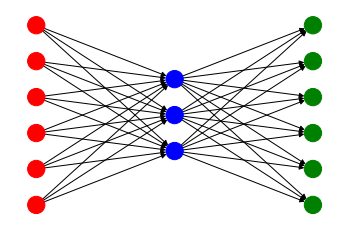

In [2]:
nn = MLP()
nn.addLayer(Dense(6,3))
nn.addLayer(Dense(3,6))
nn.plotGraph("")

<p style="text-align:justify;">
An autoencoder's structure usually looks like an hourglass tilted sideways. It consists of an encoder and a decoder neural network. The encoder tries to compress the input vector into the latent space and thus simply reduces the dimension of the input as much as possible. In the figure above the encoder consists of the red and the blue layer. The values in the blue nodes are the latent vector. The decoder takes the latent vector, i.e. the blue layer, and tries to recreate the original image. The recreated image is being stored in the green layer. So far we have established that autoencoders try to encode the dataset in a lower dimensional space. How can this be done in practice? In contrast to classifiaction tasks the dataset now doesn't consist of handwritten numbers and the corresponding labels, but the images themselves are being used instead of the labels. During the optimization, we are then minimizing the L<sup>2</sup> error between the input handwritten image and its recreation.
</p>

### Denoising Autoencoder

<p style="text-align:justify;">
Autoencoders can be used for different tasks. One of them is filtering out noise from the input images. The only difference between denoising autoencoders and vanilla autoencoders is the fact, that in a training sample the input to the network is being perturbed by some Gaussian noise. However, the output of the network is still trying to approximate the original handwritten image. Thus in a successful training process, we get a neural network which can filter out noise from images of handwritten digits.
</p>

## Demo

<p style="text-align:justify;">
Here we load a pretrained autoencoder as a Multi-Layer Perceptron and show its architecture. As you can see, we were able to reduce the 28 x 28 handwritten images to a latent vector with 10 components, which means that we have an approximately 80-fold reduction of our input dimension.
</p>

In [3]:
autoencoder = MLP()
autoencoder.load("mnist_denoising_autoencoder") # autoencoder is saved in '/models/mnist_denoising_autoencoder'
print(autoencoder)

-------------------- MULTI LAYER PERCEPTRON (MLP) --------------------

HIDDEN LAYERS = 0 
TOTAL PARAMETERS = 16474 

 *** 1. Layer: *** 
-----------------------
DENSE 784 -> 10 [ReLU]
-----------------------
Total parameters: 7850 
---> WEIGHTS: (10, 784)
---> BIASES: (10,)
-----------------------

 *** 2. Layer: *** 
--------------------------
DENSE 10 -> 784 [Sigmoid]
--------------------------
Total parameters: 8624 
---> WEIGHTS: (784, 10)
---> BIASES: (784,)
--------------------------

----------------------------------------------------------------------



We now load a mini-batch of size 1 from the shuffled MNIST dataset and take the input image from the test set.

In [4]:
dataset = Dataset(name = "mnist", train_size = 60000, test_size = 10000, batch_size = 1)
randomBatch = next(dataset.batches(autoencoder = True, noise = 0.1))
inputImage  = randomBatch[1][0]

As you can see, the input image has quite a lot of noise, which we will try to filter out with our autoencoder.

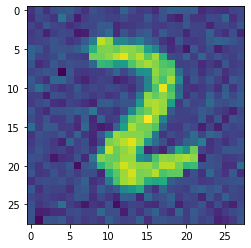

In [5]:
plt.imshow(inputImage.reshape(28,28))
plt.show()

Below you can see our recreation of the original handwritten image. Clearly the noise has been filtered out (almost) completely and up to a small error the original input image has been recreated successfully.

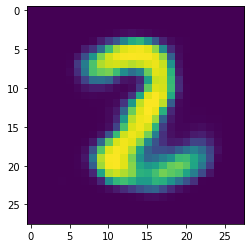

In [6]:
prediction = autoencoder.predict(inputImage)
plt.imshow(prediction.reshape(28,28))
plt.show()